# Import Libraries

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg

plt.style.use('seaborn-darkgrid')

# Read the Data

In [4]:
df = pd.read_csv('COVIDdemographic.csv')
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


In [5]:
df = df[['State', 'cases', 'deaths', 'Total Population', 'Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years',
         '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', 
         '65 to 74 years', '75 to 84 years', '85 years and over']]
df.head()

,State,cases,deaths,Total Population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over
0,Alabama,387786,14345,4887871,288589,290369,321430,332209,317810,635976,593480,626173,332700,319472,493396,251025,85242
1,Alaska,18316,367,737438,52173,52544,49747,48514,49107,117688,97020,89333,47300,46012,59630,21000,7370
2,Arizona,426614,18857,7171646,434032,441613,488738,477306,489653,979328,882618,852462,430467,436326,727956,398408,132739
3,Arkansas,161569,3301,3013825,188092,192523,203502,208021,199748,392937,367053,370343,196034,187896,296808,154699,56169
4,California,2664110,102387,39557045,2428493,2398894,2646096,2557470,2710448,6034398,5264457,5068026,2485050,2296376,3286461,1651296,729580


In [6]:
df = df.drop(columns = ['cases', 'deaths'])
df.head()

,State,Total Population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over
0,Alabama,4887871,288589,290369,321430,332209,317810,635976,593480,626173,332700,319472,493396,251025,85242
1,Alaska,737438,52173,52544,49747,48514,49107,117688,97020,89333,47300,46012,59630,21000,7370
2,Arizona,7171646,434032,441613,488738,477306,489653,979328,882618,852462,430467,436326,727956,398408,132739
3,Arkansas,3013825,188092,192523,203502,208021,199748,392937,367053,370343,196034,187896,296808,154699,56169
4,California,39557045,2428493,2398894,2646096,2557470,2710448,6034398,5264457,5068026,2485050,2296376,3286461,1651296,729580


In [7]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [8]:
df = pd.merge(df, COVID_Case, how = 'left', on = 'State')
df.head()

,State,Total Population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,cases,deaths
0,Alabama,4887871,288589,290369,321430,332209,317810,635976,593480,626173,332700,319472,493396,251025,85242,26912,785
1,Alaska,737438,52173,52544,49747,48514,49107,117688,97020,89333,47300,46012,59630,21000,7370,751,10
2,Arizona,7171646,434032,441613,488738,477306,489653,979328,882618,852462,430467,436326,727956,398408,132739,39298,1228
3,Arkansas,3013825,188092,192523,203502,208021,199748,392937,367053,370343,196034,187896,296808,154699,56169,13191,188
4,California,39557045,2428493,2398894,2646096,2557470,2710448,6034398,5264457,5068026,2485050,2296376,3286461,1651296,729580,159098,5202


In [9]:
df.shape

(51, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
State                51 non-null object
Total Population     51 non-null int64
Under 5 years        51 non-null int64
5 to 9 years         51 non-null int64
10 to 14 years       51 non-null int64
15 to 19 years       51 non-null int64
20 to 24 years       51 non-null int64
25 to 34 years       51 non-null int64
35 to 44 years       51 non-null int64
45 to 54 years       51 non-null int64
55 to 59 years       51 non-null int64
60 to 64 years       51 non-null int64
65 to 74 years       51 non-null int64
75 to 84 years       51 non-null int64
85 years and over    51 non-null int64
cases                51 non-null int64
deaths               51 non-null int64
dtypes: int64(16), object(1)
memory usage: 7.2+ KB


In [251]:
df.isnull().sum()

State                0
Total Population     0
Under 5 years        0
5 to 9 years         0
10 to 14 years       0
15 to 19 years       0
20 to 24 years       0
25 to 34 years       0
35 to 44 years       0
45 to 54 years       0
55 to 59 years       0
60 to 64 years       0
65 to 74 years       0
75 to 84 years       0
85 years and over    0
cases                0
deaths               0
dtype: int64

In [252]:
df.describe()

,Total Population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,cases,deaths
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000
mean,6.415048e+06,3.852219e+05,3.883510e+05,4.194691e+05,4.204999e+05,4.258424e+05,8.891113e+05,8.136952e+05,8.157891e+05,4.240106e+05,4.051534e+05,5.994375e+05,3.048618e+05,123604.862745,41994.235294,2290.549020
std,7.343308e+06,4.565007e+05,4.501072e+05,4.942501e+05,4.817187e+05,4.934780e+05,1.078738e+06,9.638990e+05,9.421501e+05,4.680109e+05,4.366872e+05,6.423737e+05,3.359567e+05,142146.703257,63513.183767,4748.588326
min,5.777370e+05,2.881000e+04,3.201900e+04,3.338600e+04,3.756800e+04,3.288000e+04,7.505800e+04,7.011300e+04,6.748700e+04,3.686900e+04,3.315300e+04,4.883300e+04,2.100000e+04,7370.000000,614.000000,10.000000
25%,1.780020e+06,1.038075e+05,1.105810e+05,1.186685e+05,1.198940e+05,1.148050e+05,2.185410e+05,2.192580e+05,2.099755e+05,1.174285e+05,1.136820e+05,1.706250e+05,8.526700e+04,37668.000000,9231.500000,212.000000
50%,4.468402e+06,2.734890e+05,2.799780e+05,2.858330e+05,2.889440e+05,3.007440e+05,5.926550e+05,5.568330e+05,5.673130e+05,3.035890e+05,2.953110e+05,4.354650e+05,2.118690e+05,81382.000000,20152.000000,704.000000
75%,7.353618e+06,4.461130e+05,4.540500e+05,4.784465e+05,4.682640e+05,4.913170e+05,1.070712e+06,9.444730e+05,9.262360e+05,4.893070e+05,4.615040e+05,7.193685e+05,3.616560e+05,137769.500000,46961.500000,2469.500000
max,3.955704e+07,2.428493e+06,2.398894e+06,2.646096e+06,2.557470e+06,2.710448e+06,6.034398e+06,5.264457e+06,5.068026e+06,2.485050e+06,2.296376e+06,3.286461e+06,1.651296e+06,729580.000000,389349.000000,30683.000000


In [253]:
corr = df.corr()
corr

,Total Population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,cases,deaths
Total Population,1.000000,0.994301,0.994205,0.994159,0.996431,0.997935,0.997147,0.998273,0.999294,0.996956,0.994484,0.987113,0.972106,0.964929,0.661893,0.452008
Under 5 years,0.994301,1.000000,0.999627,0.999392,0.998417,0.996974,0.995016,0.997464,0.990949,0.984225,0.979059,0.966701,0.945656,0.934517,0.635068,0.418371
5 to 9 years,0.994205,0.999627,1.000000,0.999727,0.998928,0.996929,0.994203,0.997355,0.990943,0.984184,0.979074,0.967036,0.945379,0.932996,0.625223,0.406733
10 to 14 years,0.994159,0.999392,0.999727,1.000000,0.998906,0.996780,0.994059,0.997334,0.990913,0.983932,0.978796,0.967042,0.945864,0.933797,0.621360,0.401873
15 to 19 years,0.996431,0.998417,0.998928,0.998906,1.000000,0.998400,0.994885,0.997664,0.994234,0.988875,0.984602,0.973195,0.953029,0.941984,0.641131,0.426327
20 to 24 years,0.997935,0.996974,0.996929,0.996780,0.998400,1.000000,0.998198,0.998600,0.996324,0.991692,0.987779,0.976225,0.957059,0.950304,0.655986,0.443970
25 to 34 years,0.997147,0.995016,0.994203,0.994059,0.994885,0.998198,1.000000,0.998636,0.995730,0.990648,0.986559,0.975610,0.956878,0.952543,0.658688,0.446740
35 to 44 years,0.998273,0.997464,0.997355,0.997334,0.997664,0.998600,0.998636,1.000000,0.996696,0.991293,0.987032,0.977219,0.958571,0.950493,0.647128,0.431053
45 to 54 years,0.999294,0.990949,0.990943,0.990913,0.994234,0.996324,0.995730,0.996696,1.000000,0.998247,0.996075,0.988729,0.974447,0.968699,0.675492,0.468489
55 to 59 years,0.996956,0.984225,0.984184,0.983932,0.988875,0.991692,0.990648,0.991293,0.998247,1.000000,0.999255,0.993680,0.982651,0.978910,0.687094,0.486530


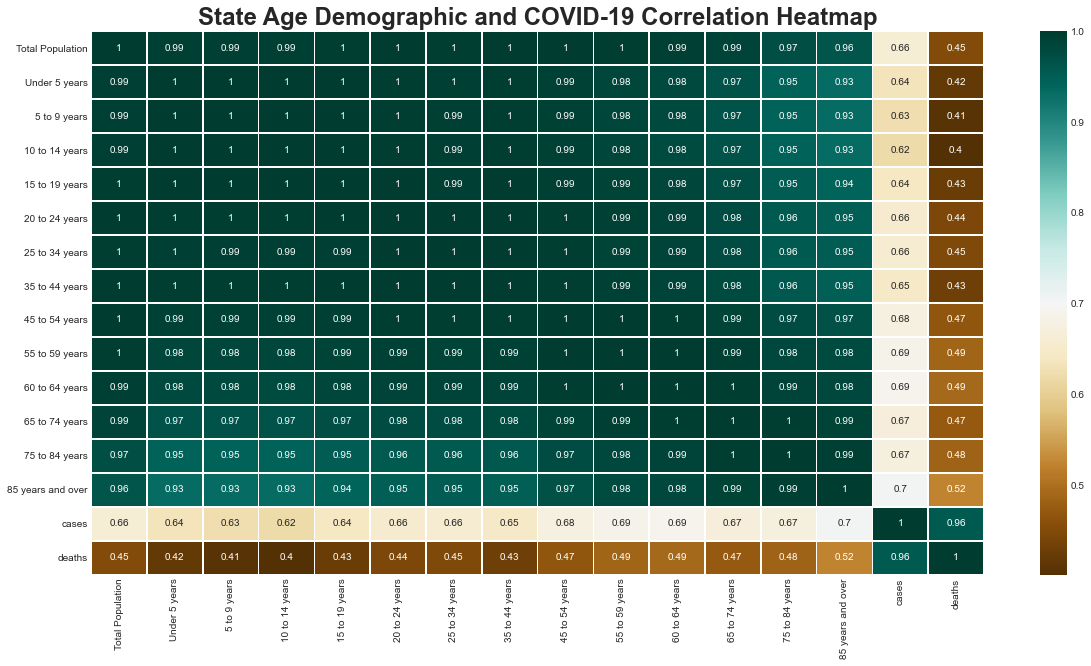

In [254]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Age Demographic and COVID-19 Correlation Heatmap', fontweight = 'bold', fontsize = 24)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360);

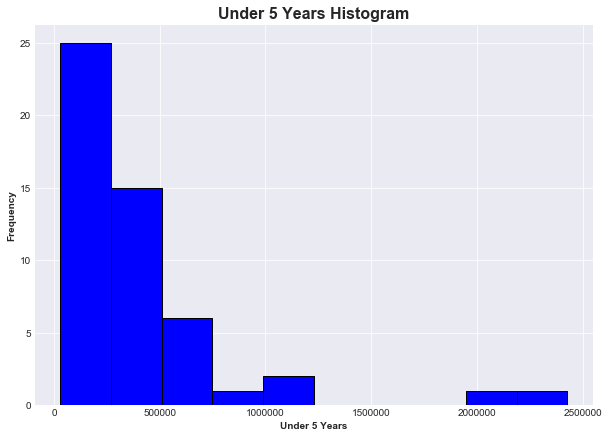

In [15]:
plt.style.use('seaborn-darkgrid')

df['Under 5 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Under 5 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Under 5 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

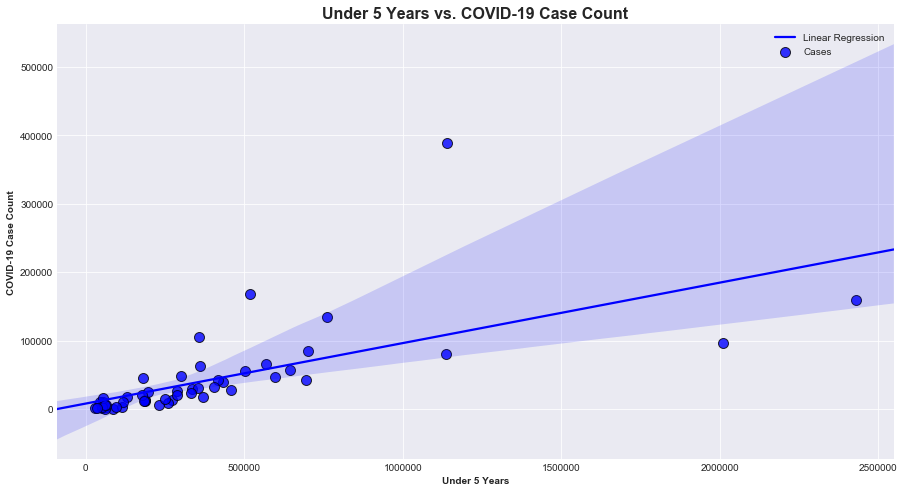

In [14]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Under 5 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Under 5 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Under 5 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [257]:
spearmanr(df['cases'], df['Under 5 years'])

SpearmanrResult(correlation=0.8876923076923077, pvalue=3.97601914825736e-18)

# OLS Regression 

In [258]:
model1 = sm.OLS(df['cases'], df['Under 5 years']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.581
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                              69.31
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    5.25e-11
Time:                        13:59:25   Log-Likelihood:                         -623.10
No. Observations:                  51   AIC:                                      1248.
Df Residuals:                      50   BIC:                                      1250.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Under 5 years     0.0970      0.012      8.325      0.000       0.074       0.120
==============================================================================
Omnibus:                       69.792   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.281
Skew:                           3.512   Prob(JB):                    1.35e-170
Kurtosis:                      20.855   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

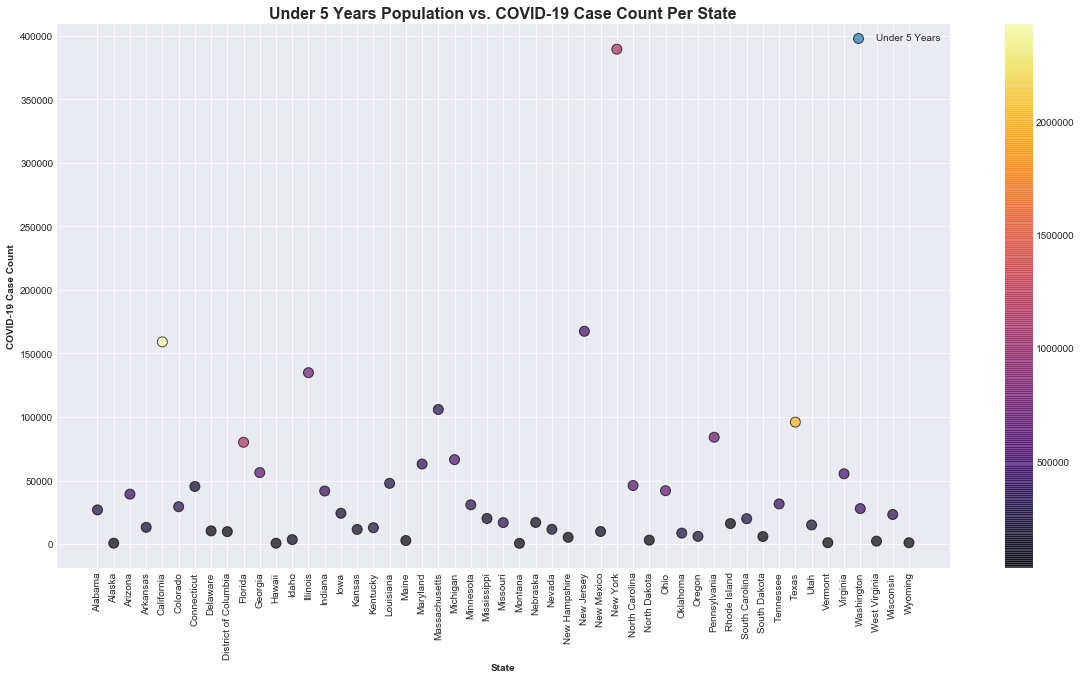

In [22]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Under 5 years'], cmap = 'inferno')
plt.title('Under 5 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Under 5 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

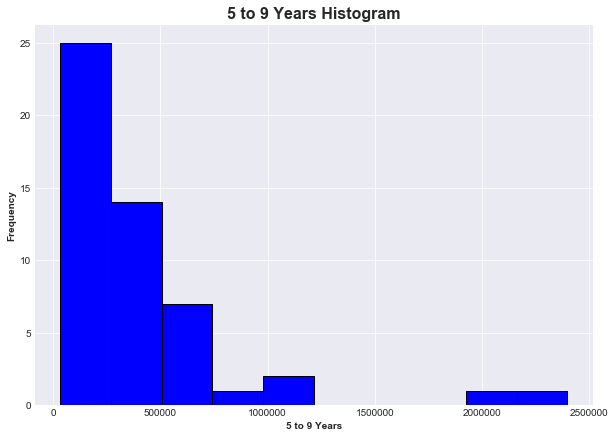

In [16]:
plt.style.use('seaborn-darkgrid')

df['5 to 9 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('5 to 9 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('5 to 9 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

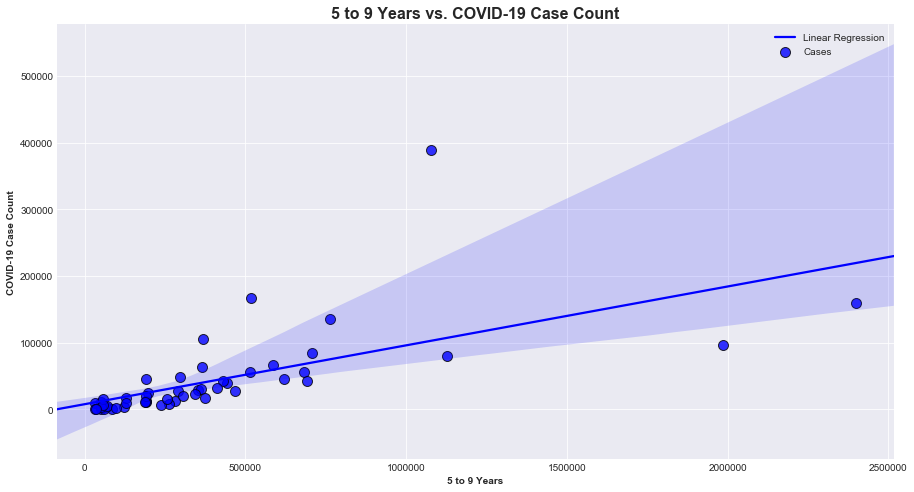

In [17]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '5 to 9 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('5 to 9 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('5 to 9 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [262]:
spearmanr(df['cases'], df['5 to 9 years'])

SpearmanrResult(correlation=0.8886877828054298, pvalue=3.2349051435463972e-18)

# OLS Regression Result

In [263]:
model2 = sm.OLS(df['cases'], df['5 to 9 years']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.564
Method:                 Least Squares   F-statistic:                              67.04
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    8.53e-11
Time:                        13:59:27   Log-Likelihood:                         -623.58
No. Observations:                  51   AIC:                                      1249.
Df Residuals:                      50   BIC:                                      1251.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
5 to 9 years     0.0968      0.012      8.188      0.000       0.073       0.121
==============================================================================
Omnibus:                       72.307   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.210
Skew:                           3.677   Prob(JB):                    2.18e-188
Kurtosis:                      21.778   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

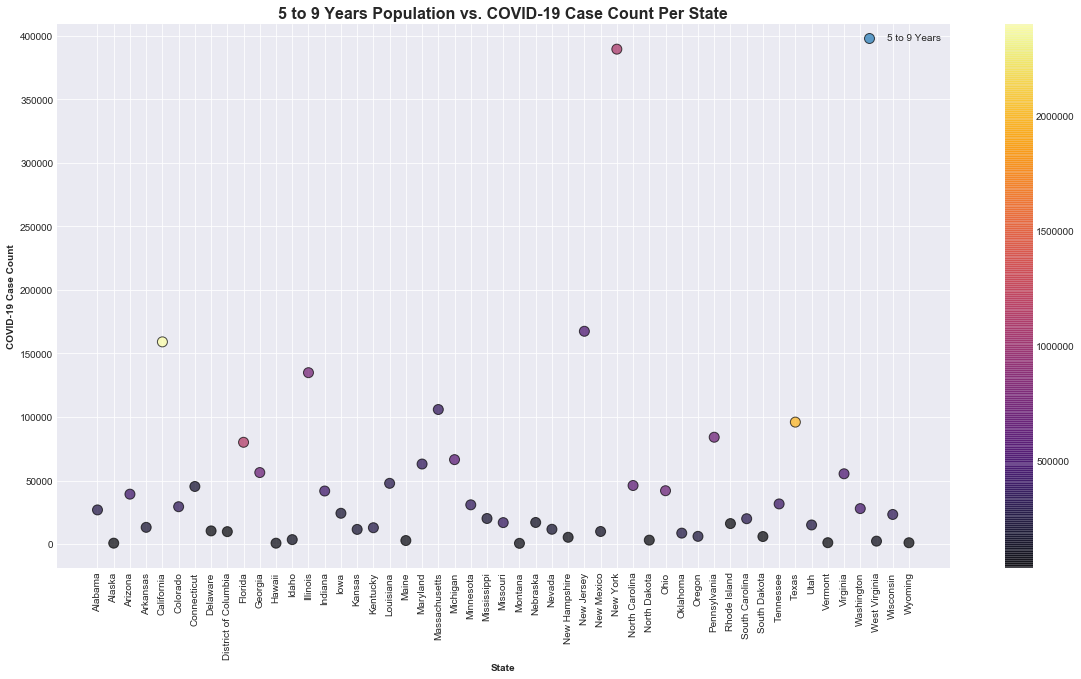

In [21]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['5 to 9 years'], cmap = 'inferno')
plt.title('5 to 9 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['5 to 9 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

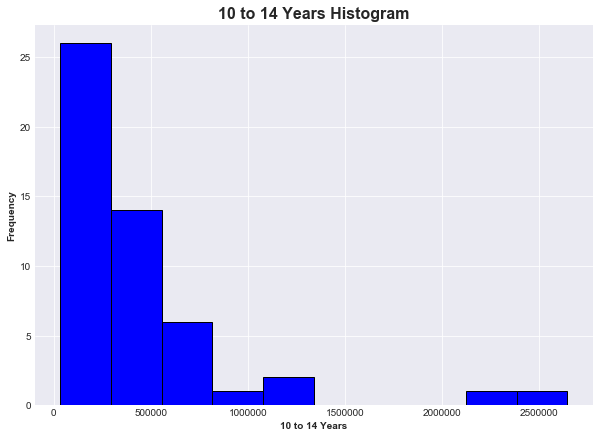

In [18]:
plt.style.use('seaborn-darkgrid')

df['10 to 14 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('10 to 14 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('10 to 14 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

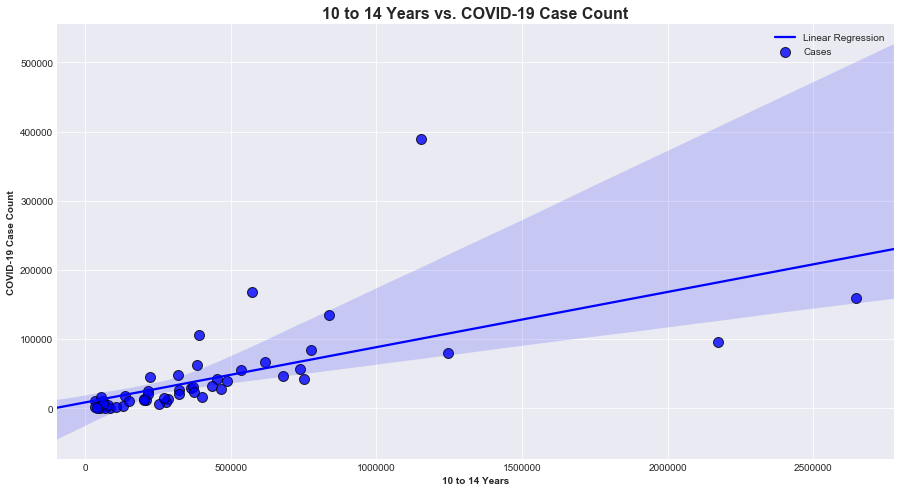

In [19]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '10 to 14 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('10 to 14 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('10 to 14 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [267]:
spearmanr(df['cases'], df['10 to 14 years'])

SpearmanrResult(correlation=0.8892307692307692, pvalue=2.8882660205905688e-18)

# OLS Regression

In [268]:
model3 = sm.OLS(df['cases'], df['10 to 14 years']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.568
Model:                            OLS   Adj. R-squared (uncentered):              0.559
Method:                 Least Squares   F-statistic:                              65.78
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    1.12e-10
Time:                        13:59:28   Log-Likelihood:                         -623.86
No. Observations:                  51   AIC:                                      1250.
Df Residuals:                      50   BIC:                                      1252.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
10 to 14 years     0.0884      0.011      8.110      0.000       0.067       0.110
==============================================================================
Omnibus:                       72.481   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              876.557
Skew:                           3.683   Prob(JB):                    4.55e-191
Kurtosis:                      21.927   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

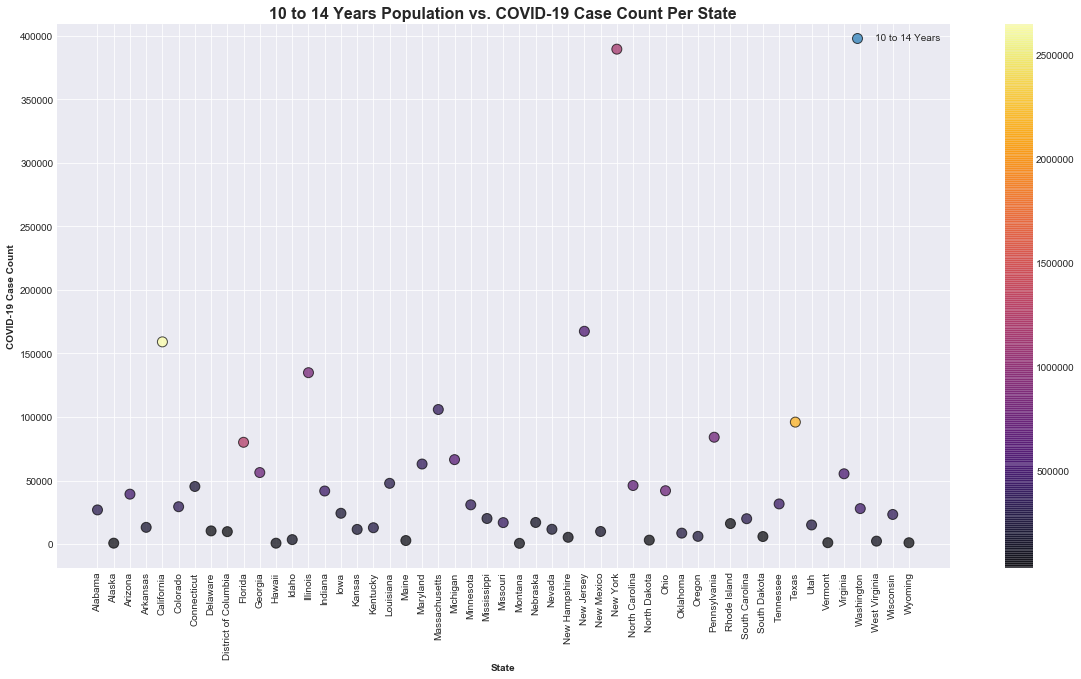

In [20]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['10 to 14 years'], cmap = 'inferno')
plt.title('10 to 14 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['10 to 14 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

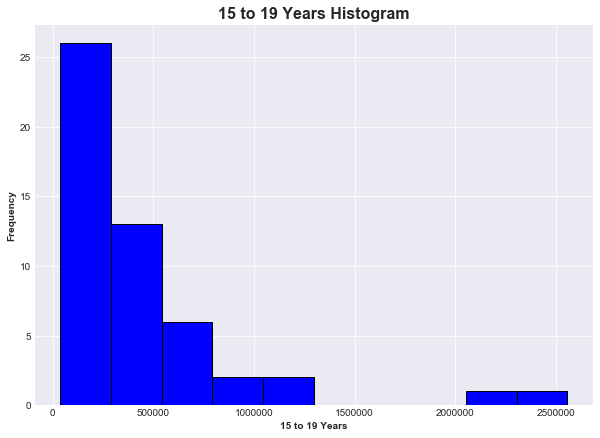

In [23]:
plt.style.use('seaborn-darkgrid')

df['15 to 19 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('15 to 19 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('15 to 19 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

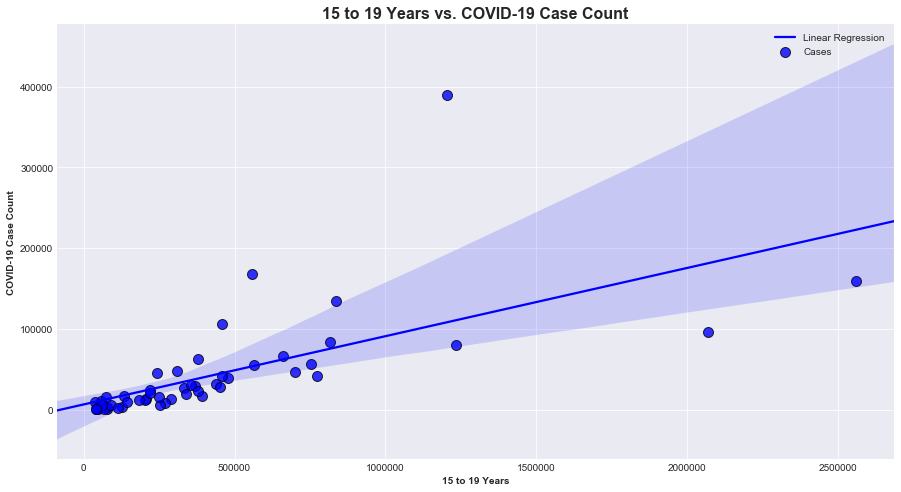

In [24]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '15 to 19 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('15 to 19 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('15 to 19 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [272]:
spearmanr(df['cases'], df['15 to 19 years'])

SpearmanrResult(correlation=0.8971040723981899, pvalue=5.208707280098496e-19)

# OLS Regression

In [273]:
model4 = sm.OLS(df['cases'], df['15 to 19 years']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.589
Model:                            OLS   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              71.53
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    3.29e-11
Time:                        13:59:30   Log-Likelihood:                         -622.62
No. Observations:                  51   AIC:                                      1247.
Df Residuals:                      50   BIC:                                      1249.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
15 to 19 years     0.0912      0.011      8.458      0.000       0.070       0.113
==============================================================================
Omnibus:                       72.697   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              877.435
Skew:                           3.703   Prob(JB):                    2.93e-191
Kurtosis:                      21.923   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

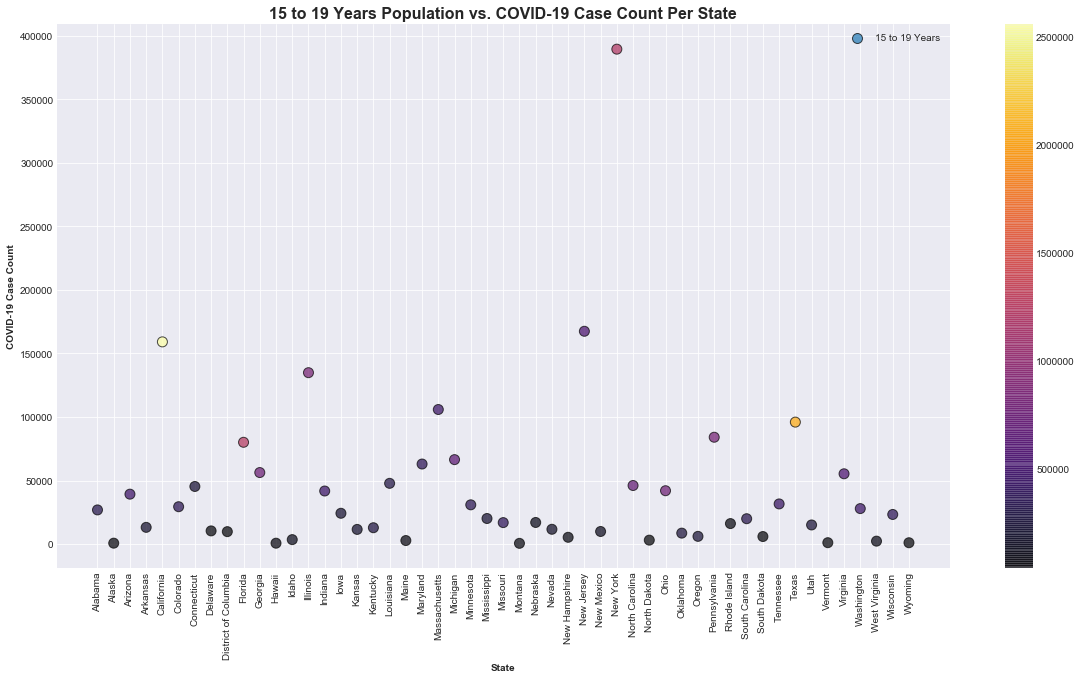

In [25]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['15 to 19 years'], cmap = 'inferno')
plt.title('15 to 19 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['15 to 19 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

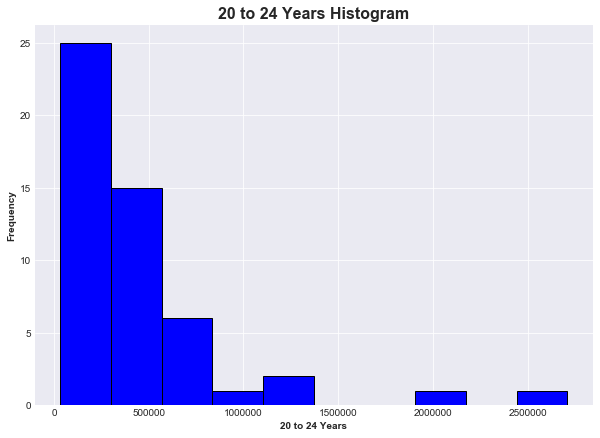

In [26]:
plt.style.use('seaborn-darkgrid')

df['20 to 24 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('20 to 24 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('20 to 24 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

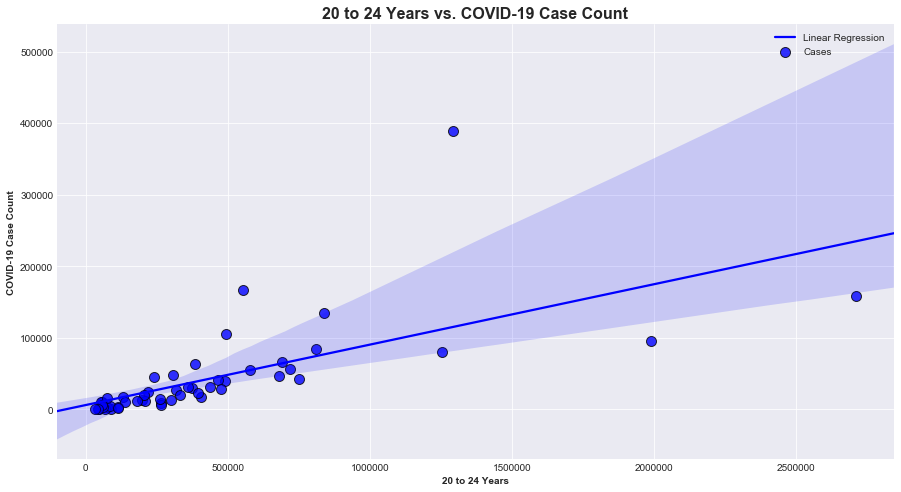

In [27]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '20 to 24 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('20 to 24 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('20 to 24 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [277]:
spearmanr(df['cases'], df['20 to 24 years'])

SpearmanrResult(correlation=0.9008144796380091, pvalue=2.213297631318392e-19)

# OLS Regression

In [278]:
model5 = sm.OLS(df['cases'], df['20 to 24 years']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              75.75
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    1.39e-11
Time:                        13:59:31   Log-Likelihood:                         -621.76
No. Observations:                  51   AIC:                                      1246.
Df Residuals:                      50   BIC:                                      1247.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
20 to 24 years     0.0906      0.010      8.703      0.000       0.070       0.111
==============================================================================
Omnibus:                       70.998   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.915
Skew:                           3.597   Prob(JB):                    1.82e-177
Kurtosis:                      21.201   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

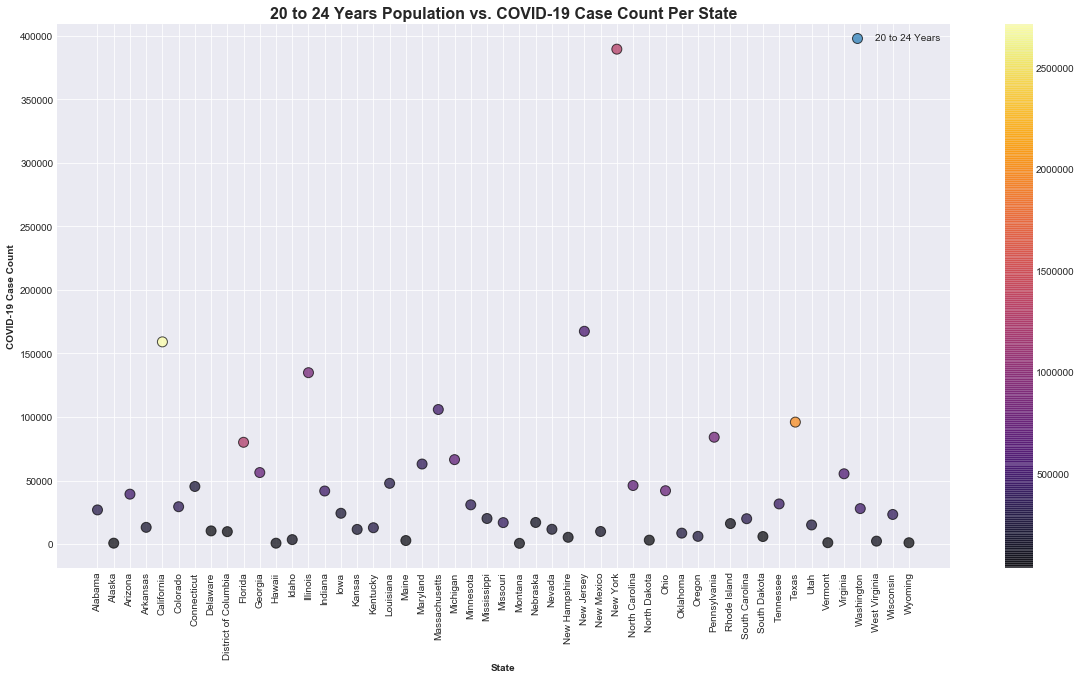

In [28]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['20 to 24 years'], cmap = 'inferno')
plt.title('20 to 24 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['20 to 24 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

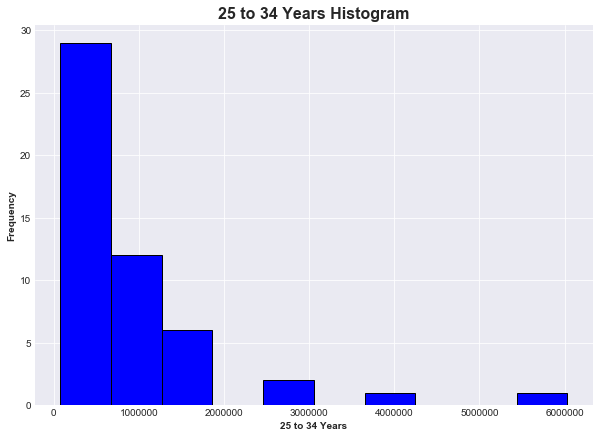

In [29]:
plt.style.use('seaborn-darkgrid')

df['25 to 34 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('25 to 34 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('25 to 34 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

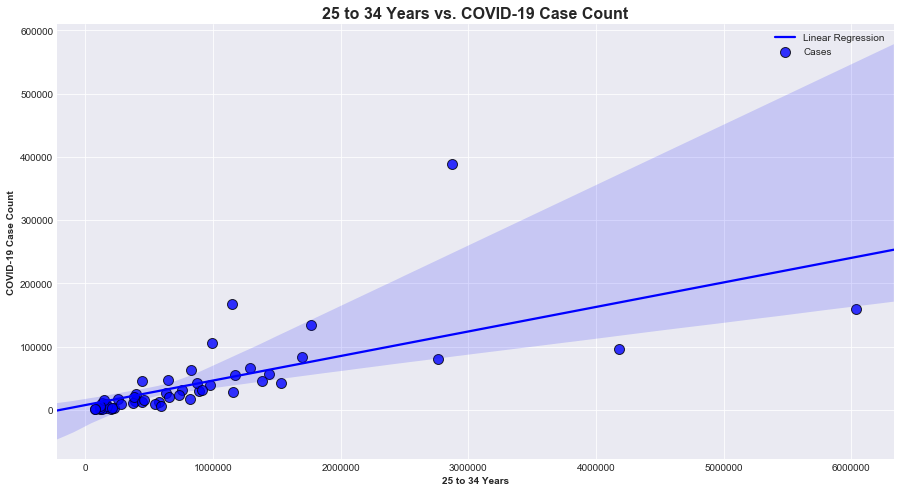

In [30]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '25 to 34 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('25 to 34 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('25 to 34 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [282]:
spearmanr(df['cases'], df['25 to 34 years'])

SpearmanrResult(correlation=0.898552036199095, pvalue=3.7444414368192547e-19)

# OLS Regression

In [283]:
model6 = sm.OLS(df['cases'], df['25 to 34 years']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.603
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              75.83
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    1.36e-11
Time:                        13:59:33   Log-Likelihood:                         -621.74
No. Observations:                  51   AIC:                                      1245.
Df Residuals:                      50   BIC:                                      1247.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
25 to 34 years     0.0422      0.005      8.708      0.000       0.032       0.052
==============================================================================
Omnibus:                       67.645   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.745
Skew:                           3.381   Prob(JB):                    2.80e-155
Kurtosis:                      20.007   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

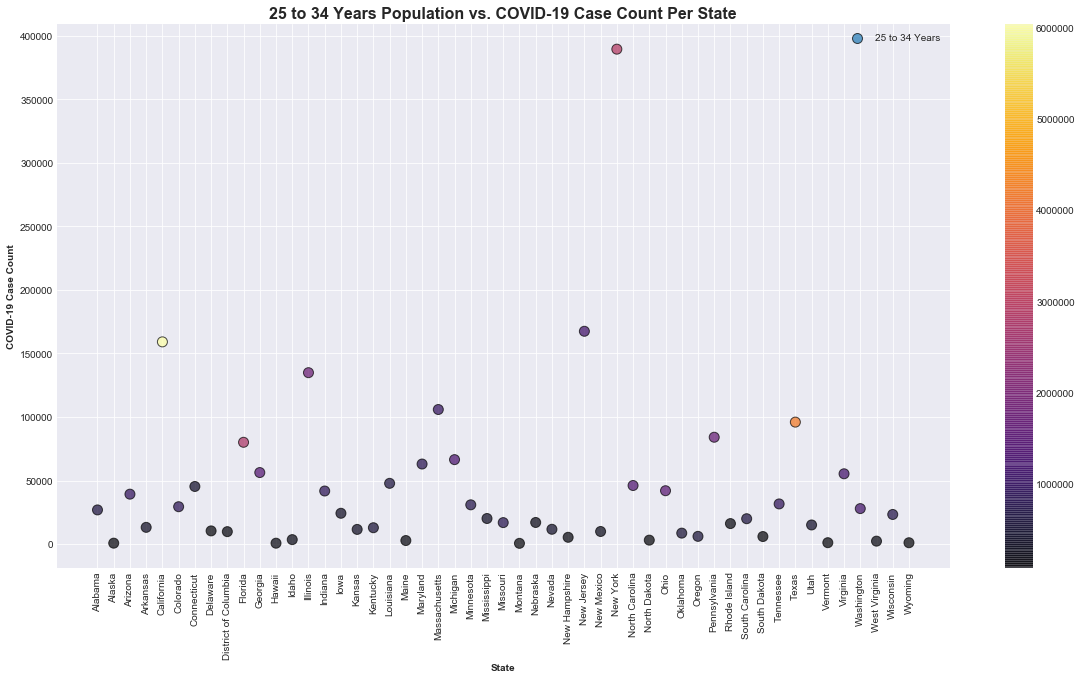

In [31]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['25 to 34 years'], cmap = 'inferno')
plt.title('25 to 34 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['25 to 34 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

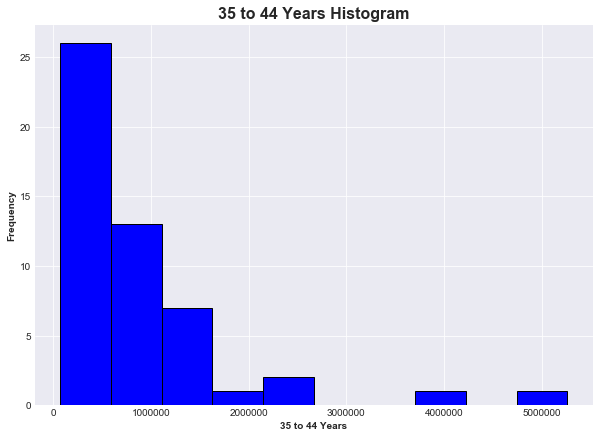

In [32]:
plt.style.use('seaborn-darkgrid')

df['35 to 44 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('35 to 44 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('35 to 44 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

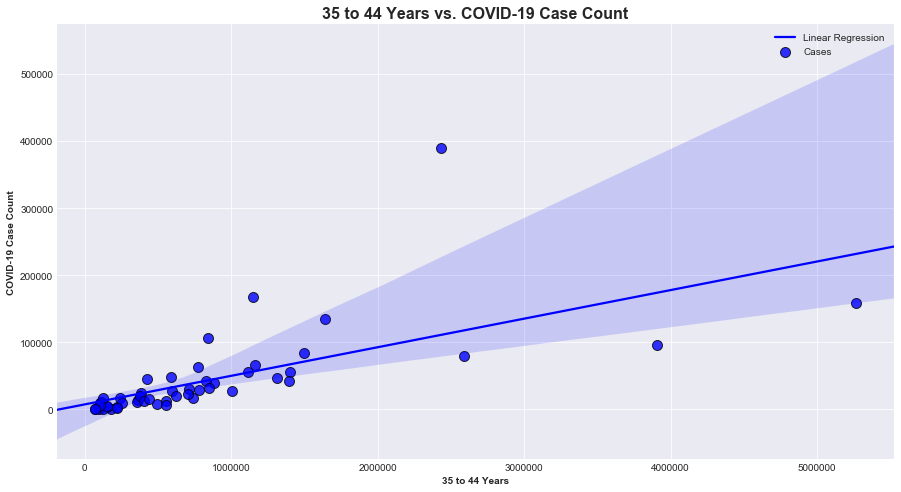

In [33]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '35 to 44 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('35 to 44 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('35 to 44 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [287]:
spearmanr(df['cases'], df['35 to 44 years'])

SpearmanrResult(correlation=0.8968325791855204, pvalue=5.538214693303711e-19)

# OLS Regression 

In [288]:
model7 = sm.OLS(df['cases'], df['35 to 44 years']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              72.74
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    2.56e-11
Time:                        13:59:35   Log-Likelihood:                         -622.37
No. Observations:                  51   AIC:                                      1247.
Df Residuals:                      50   BIC:                                      1249.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
35 to 44 years     0.0464      0.005      8.529      0.000       0.035       0.057
==============================================================================
Omnibus:                       70.861   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              816.881
Skew:                           3.581   Prob(JB):                    4.14e-178
Kurtosis:                      21.252   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

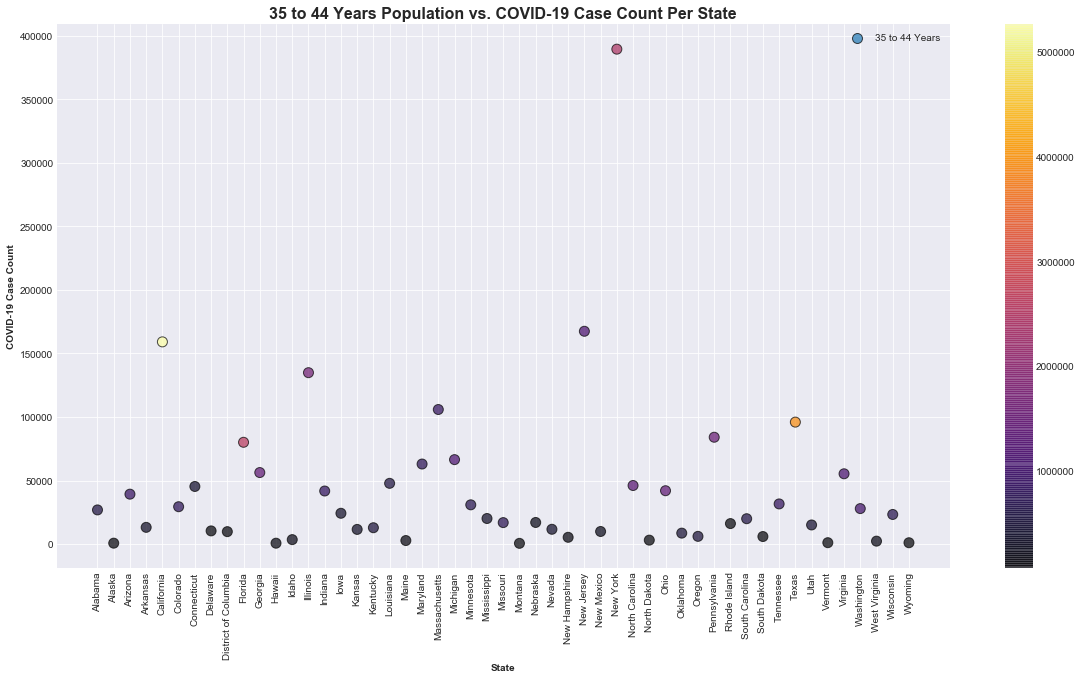

In [34]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['35 to 44 years'], cmap = 'inferno')
plt.title('35 to 44 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['35 to 44 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

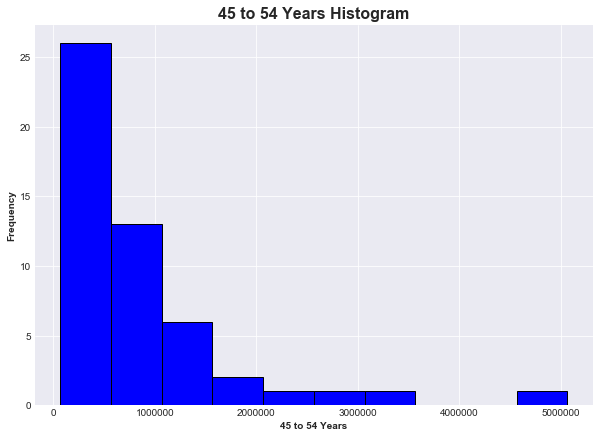

In [35]:
plt.style.use('seaborn-darkgrid')

df['45 to 54 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('45 to 54 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('45 to 54 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

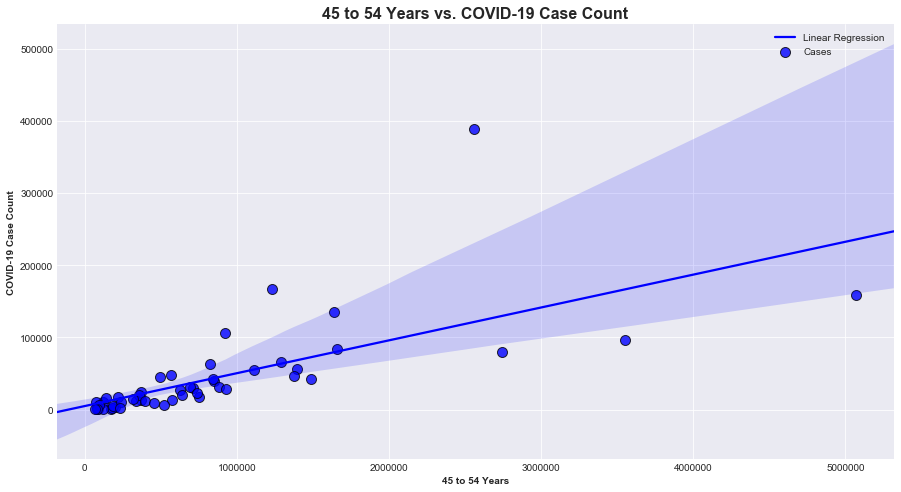

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '45 to 54 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('45 to 54 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('45 to 54 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();


# Spearman Correlation

In [292]:
spearmanr(df['cases'], df['45 to 54 years'])

SpearmanrResult(correlation=0.8994570135746606, pvalue=3.038772492705375e-19)

# OLS Regression

In [293]:
model8 = sm.OLS(df['cases'], df['45 to 54 years']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.614
Method:                 Least Squares   F-statistic:                              82.15
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    3.95e-12
Time:                        13:59:36   Log-Likelihood:                         -620.49
No. Observations:                  51   AIC:                                      1243.
Df Residuals:                      50   BIC:                                      1245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
45 to 54 years     0.0481      0.005      9.064      0.000       0.037       0.059
==============================================================================
Omnibus:                       71.346   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.126
Skew:                           3.614   Prob(JB):                    3.34e-181
Kurtosis:                      21.408   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

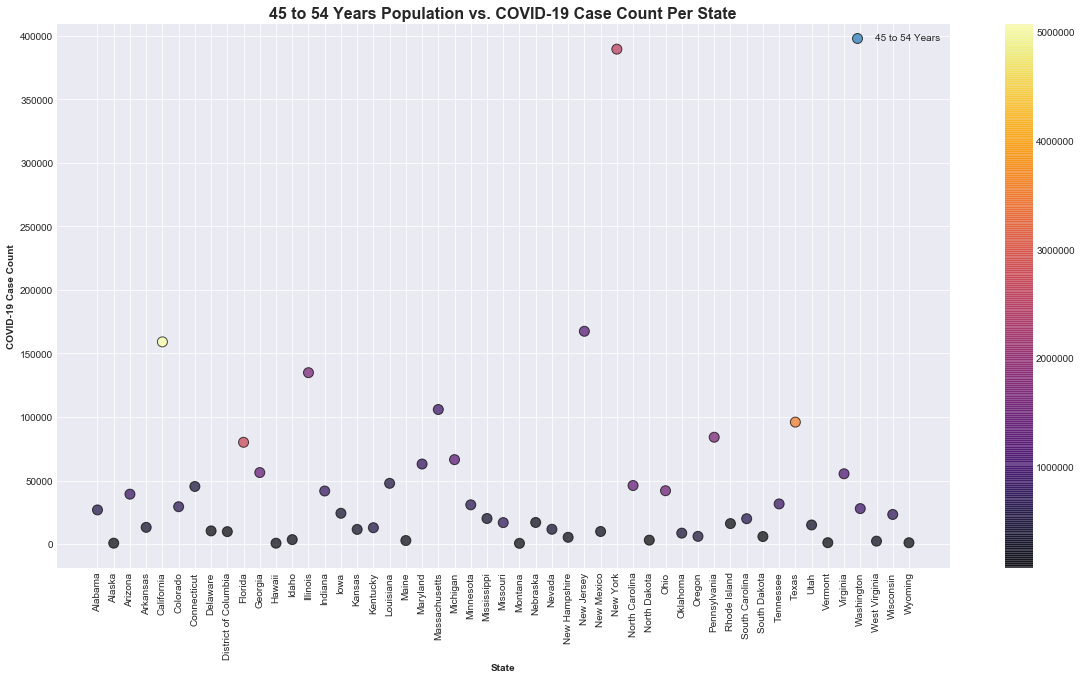

In [37]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['45 to 54 years'], cmap = 'inferno')
plt.title('45 to 54 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['45 to 54 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

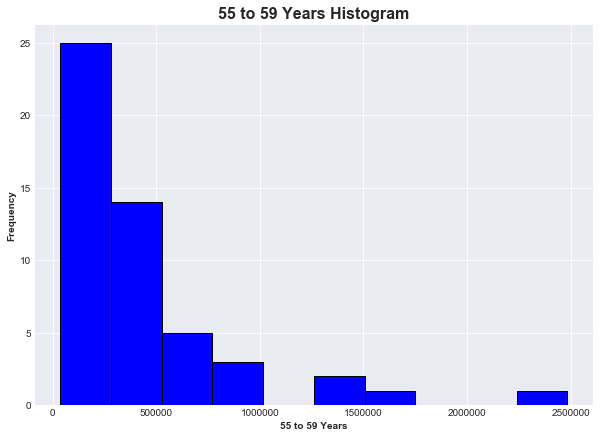

In [38]:
plt.style.use('seaborn-darkgrid')

df['55 to 59 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('55 to 59 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('55 to 59 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

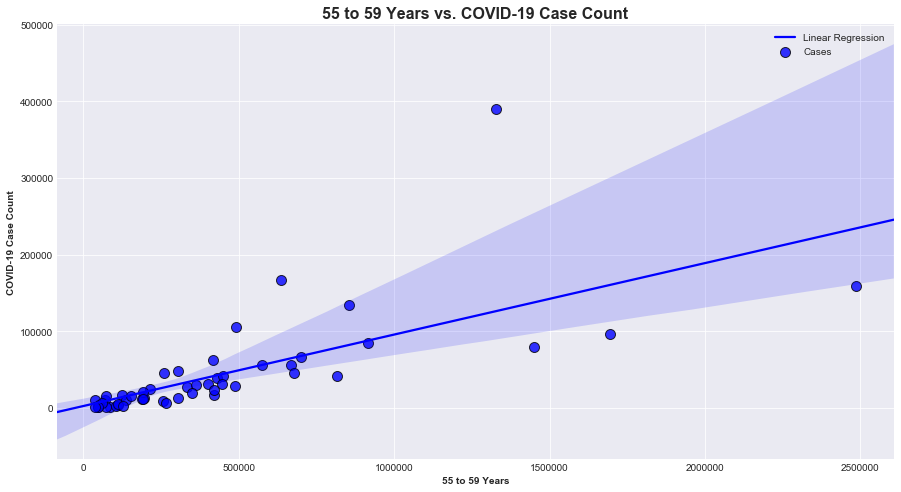

In [39]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '55 to 59 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('55 to 59 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('55 to 59 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [297]:
spearmanr(df['cases'], df['55 to 59 years'])

SpearmanrResult(correlation=0.8986425339366515, pvalue=3.6673858232761137e-19)

# OLS Regression

In [298]:
model9 = sm.OLS(df['cases'], df['55 to 59 years']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.634
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                              86.73
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    1.67e-12
Time:                        13:59:38   Log-Likelihood:                         -619.62
No. Observations:                  51   AIC:                                      1241.
Df Residuals:                      50   BIC:                                      1243.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
55 to 59 years     0.0959      0.010      9.313      0.000       0.075       0.117
==============================================================================
Omnibus:                       72.613   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.970
Skew:                           3.707   Prob(JB):                    4.06e-188
Kurtosis:                      21.738   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

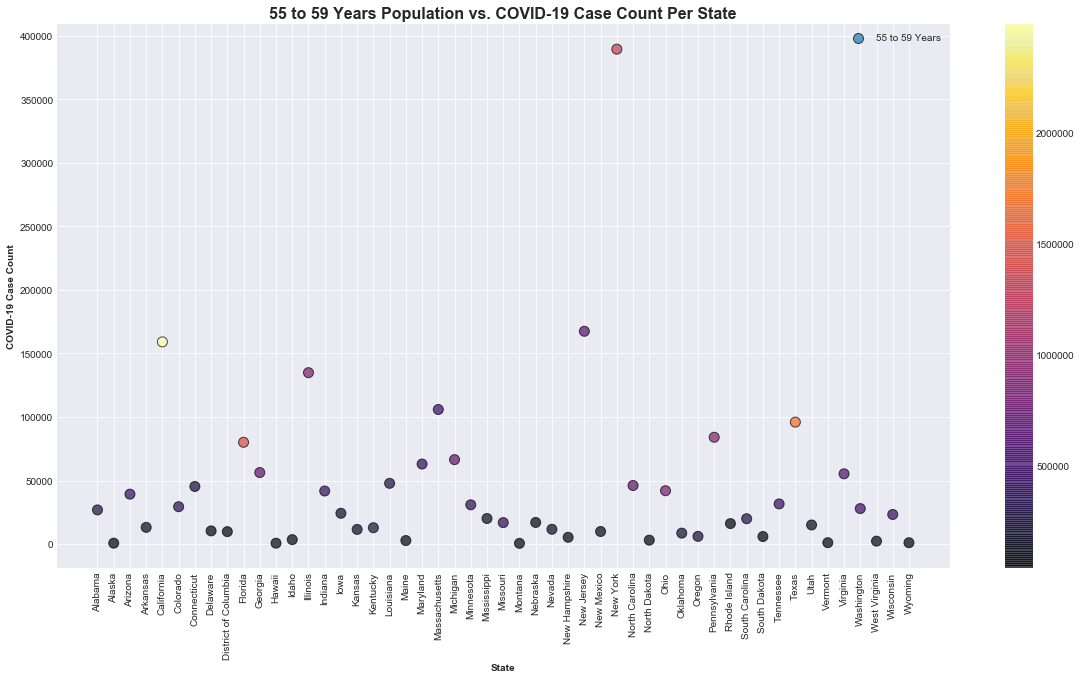

In [40]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['55 to 59 years'], cmap = 'inferno')
plt.title('55 to 59 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['55 to 59 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

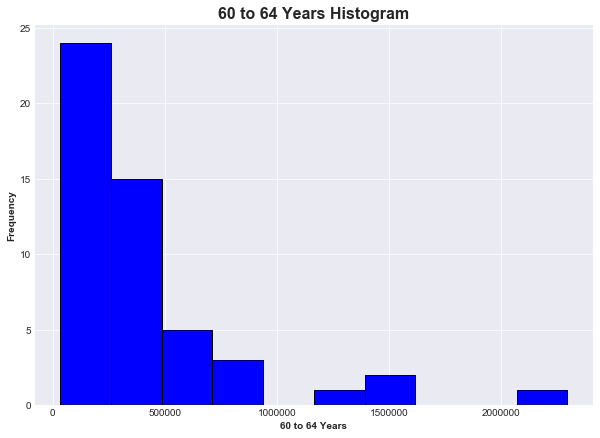

In [41]:
plt.style.use('seaborn-darkgrid')

df['60 to 64 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('60 to 64 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('60 to 64 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

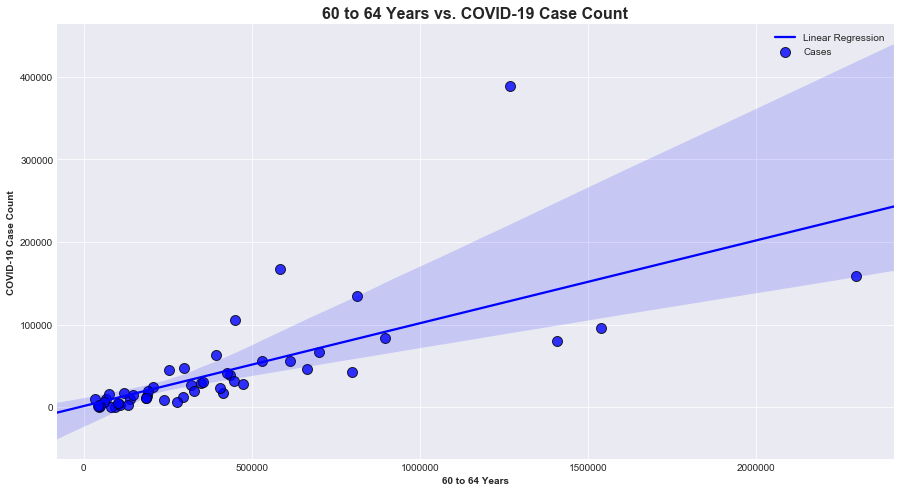

In [42]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '60 to 64 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('60 to 64 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('60 to 64 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [302]:
spearmanr(df['cases'], df['60 to 64 years'])

SpearmanrResult(correlation=0.8970135746606335, pvalue=5.316405866368099e-19)

# OLS Regression

In [303]:
model10 = sm.OLS(df['cases'], df['60 to 64 years']).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              87.72
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    1.39e-12
Time:                        13:59:39   Log-Likelihood:                         -619.44
No. Observations:                  51   AIC:                                      1241.
Df Residuals:                      50   BIC:                                      1243.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
60 to 64 years     0.1019      0.011      9.366      0.000       0.080       0.124
==============================================================================
Omnibus:                       72.781   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              854.844
Skew:                           3.731   Prob(JB):                    2.36e-186
Kurtosis:                      21.617   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

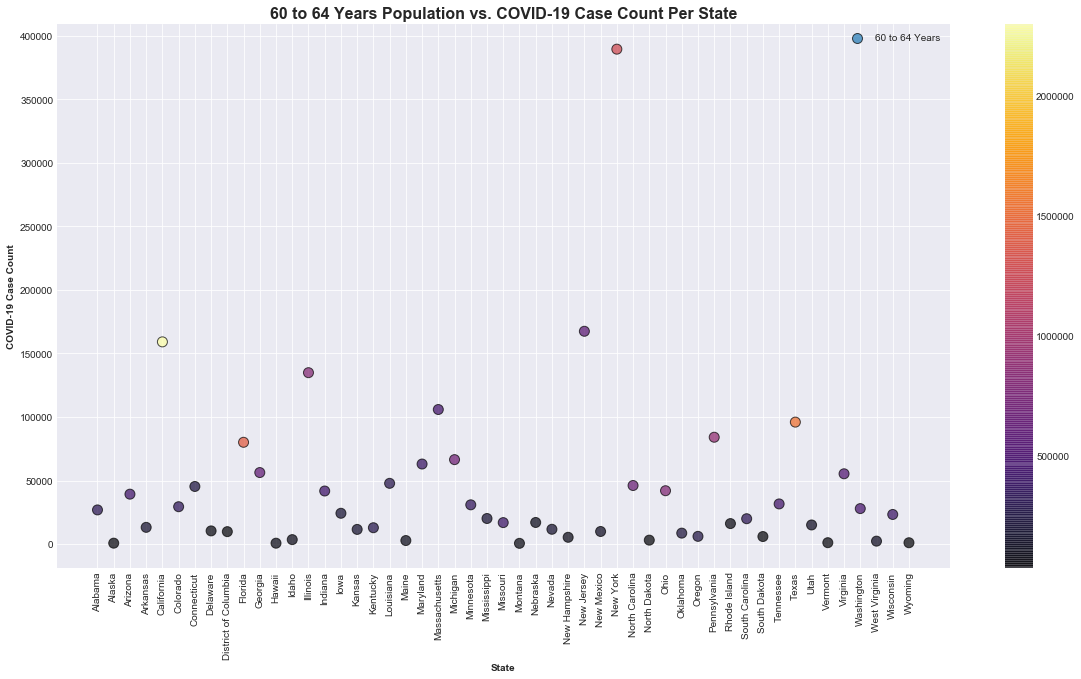

In [44]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['60 to 64 years'], cmap = 'inferno')
plt.title('60 to 64 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['60 to 64 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

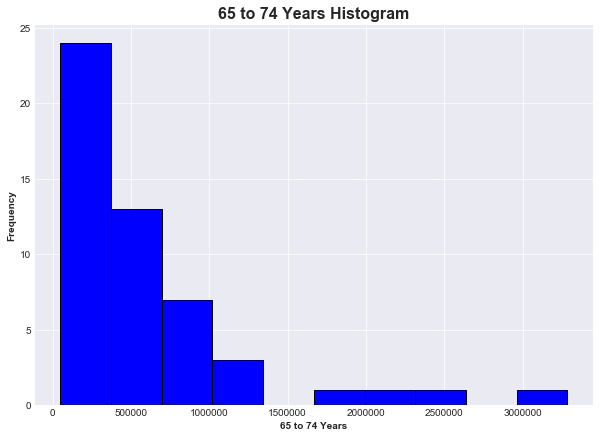

In [45]:
plt.style.use('seaborn-darkgrid')

df['65 to 74 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('65 to 74 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('65 to 74 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

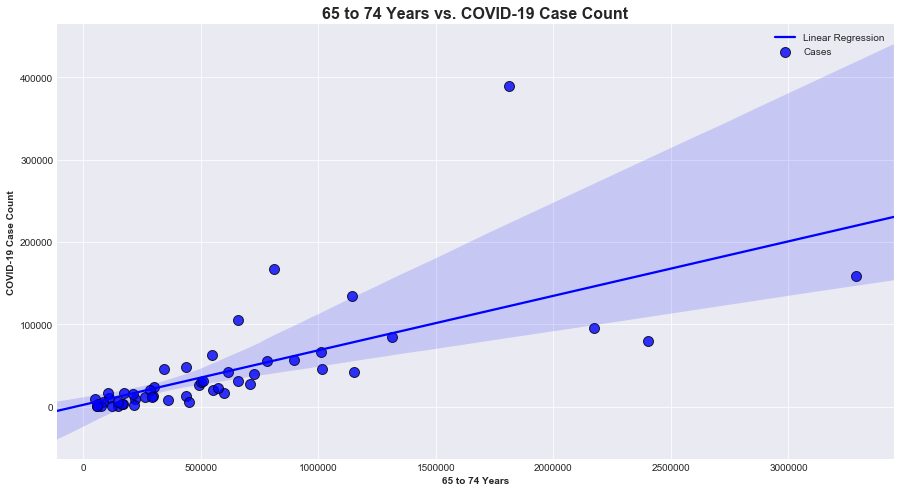

In [46]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '65 to 74 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('65 to 74 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('65 to 74 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [307]:
spearmanr(df['cases'], df['65 to 74 years'])

SpearmanrResult(correlation=0.8797285067873303, pvalue=1.937047011685563e-17)

# OLS Regression

In [308]:
model11 = sm.OLS(df['cases'], df['65 to 74 years']).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              80.80
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    5.11e-12
Time:                        13:59:40   Log-Likelihood:                         -620.75
No. Observations:                  51   AIC:                                      1244.
Df Residuals:                      50   BIC:                                      1245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
65 to 74 years     0.0680      0.008      8.989      0.000       0.053       0.083
==============================================================================
Omnibus:                       72.066   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.996
Skew:                           3.687   Prob(JB):                    2.63e-180
Kurtosis:                      21.298   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

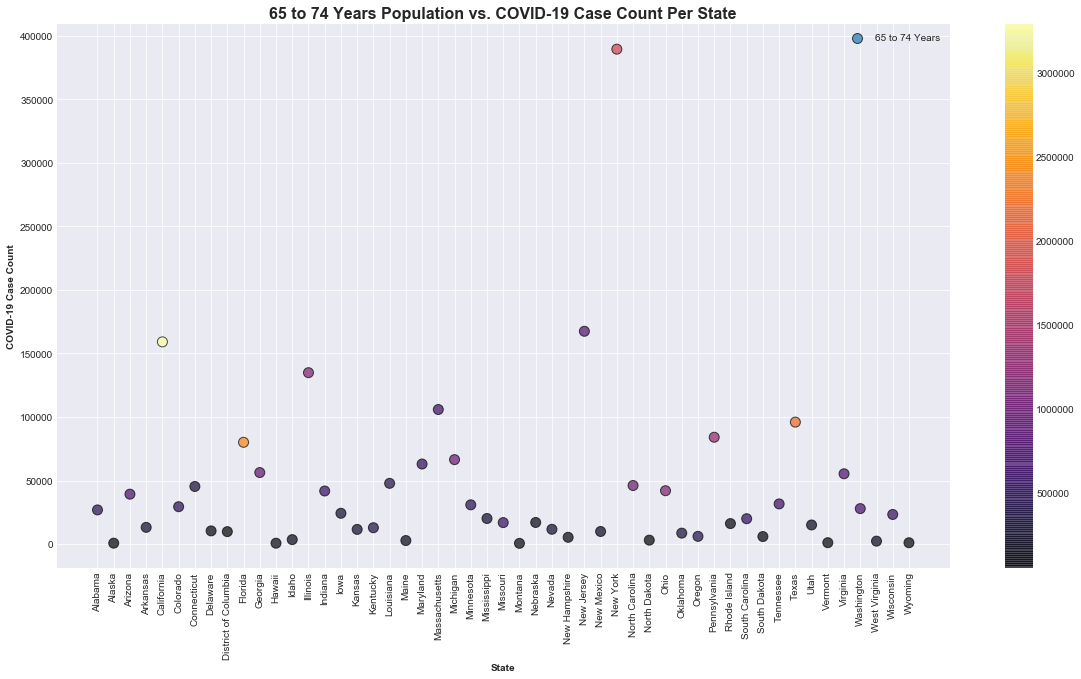

In [47]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['65 to 74 years'], cmap = 'inferno')
plt.title('65 to 74 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['65 to 74 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

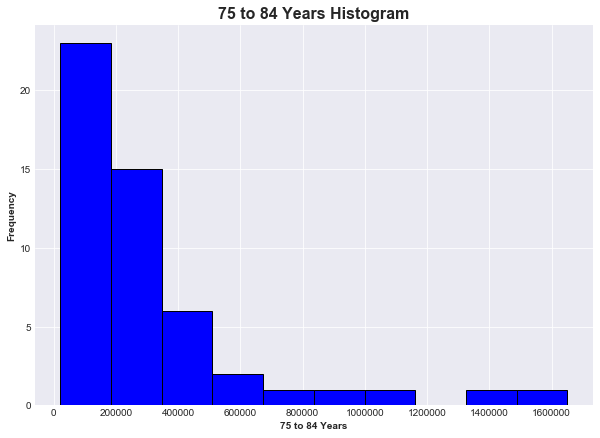

In [48]:
plt.style.use('seaborn-darkgrid')

df['75 to 84 years'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('75 to 84 Years Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('75 to 84 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

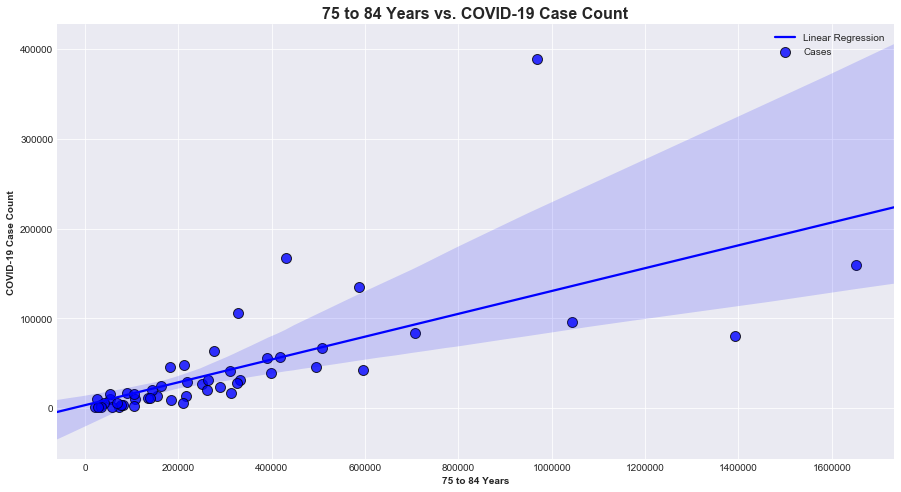

In [49]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '75 to 84 years', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('75 to 84 Years vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('75 to 84 Years', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [312]:
spearmanr(df['cases'], df['75 to 84 years'])

SpearmanrResult(correlation=0.8880542986425339, pvalue=3.689514346743637e-18)

# OLS Regression

In [313]:
model12 = sm.OLS(df['cases'], df['75 to 84 years']).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.621
Model:                            OLS   Adj. R-squared (uncentered):              0.613
Method:                 Least Squares   F-statistic:                              81.87
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    4.16e-12
Time:                        13:59:41   Log-Likelihood:                         -620.54
No. Observations:                  51   AIC:                                      1243.
Df Residuals:                      50   BIC:                                      1245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
75 to 84 years     0.1321      0.015      9.048      0.000       0.103       0.161
==============================================================================
Omnibus:                       68.498   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.998
Skew:                           3.432   Prob(JB):                    2.05e-161
Kurtosis:                      20.353   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

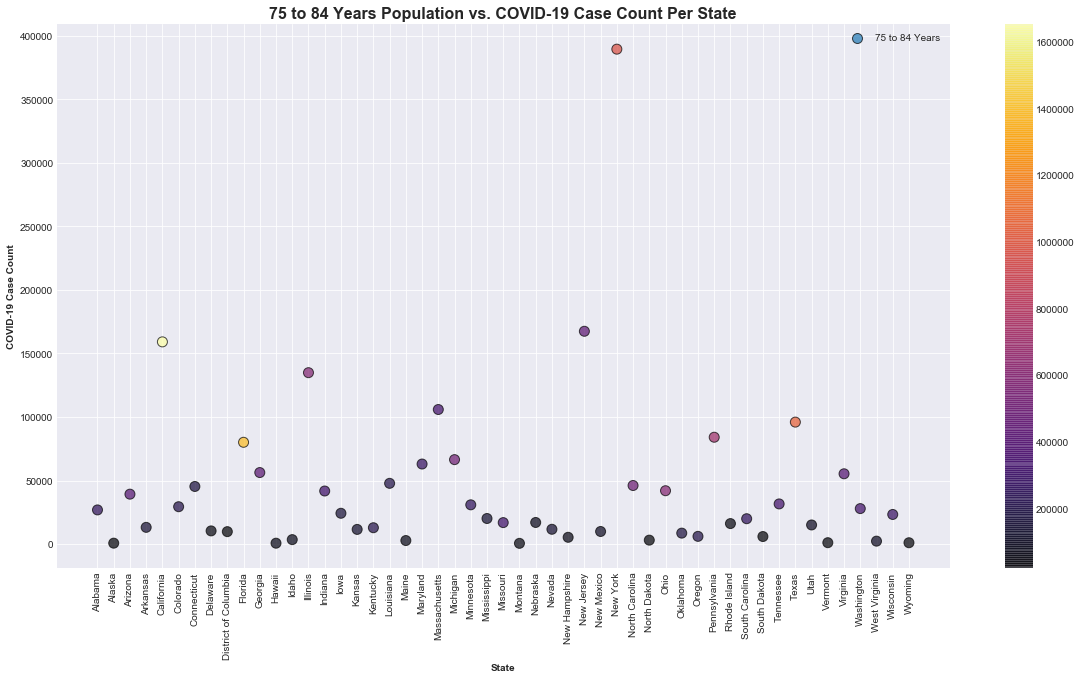

In [51]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['75 to 84 years'], cmap = 'inferno')
plt.title('75 to 84 Years Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['75 to 84 Years'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

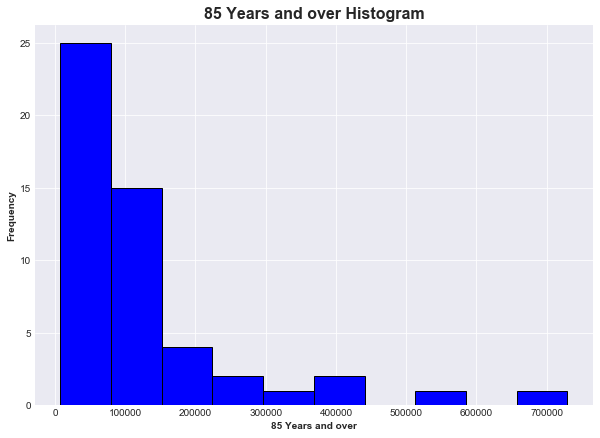

In [52]:
plt.style.use('seaborn-darkgrid')

df['85 years and over'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('85 Years and over Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('85 Years and over', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

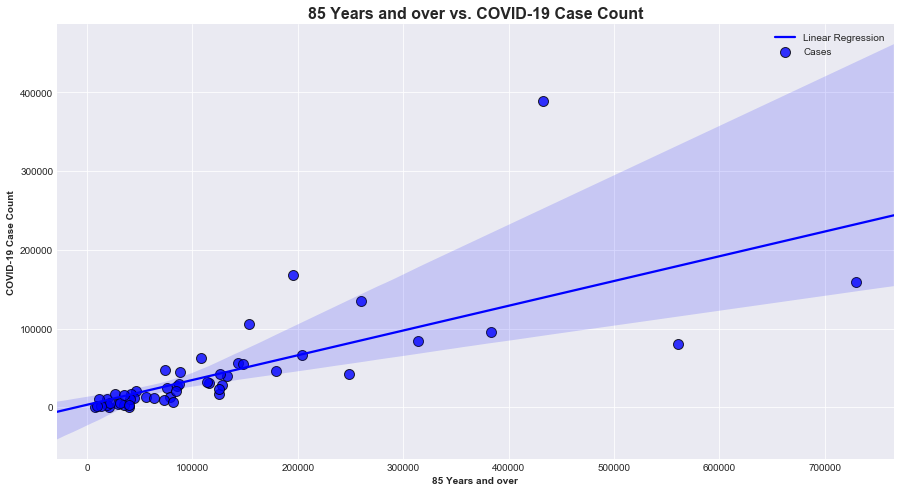

In [53]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '85 years and over', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('85 Years and over vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('85 Years and over', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [317]:
spearmanr(df['cases'], df['85 years and over'])

SpearmanrResult(correlation=0.9026244343891403, pvalue=1.440051804832582e-19)

# OLS Regression

In [318]:
model13 = sm.OLS(df['cases'], df['85 years and over']).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                              92.76
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    5.61e-13
Time:                        13:59:43   Log-Likelihood:                         -618.52
No. Observations:                  51   AIC:                                      1239.
Df Residuals:                      50   BIC:                                      1241.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
85 years and over     0.3254      0.034      9.631      0.000       0.258       0.393
==============================================================================
Omnibus:                       65.217   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.366
Skew:                           3.199   Prob(JB):                    9.94e-147
Kurtosis:                      19.597   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

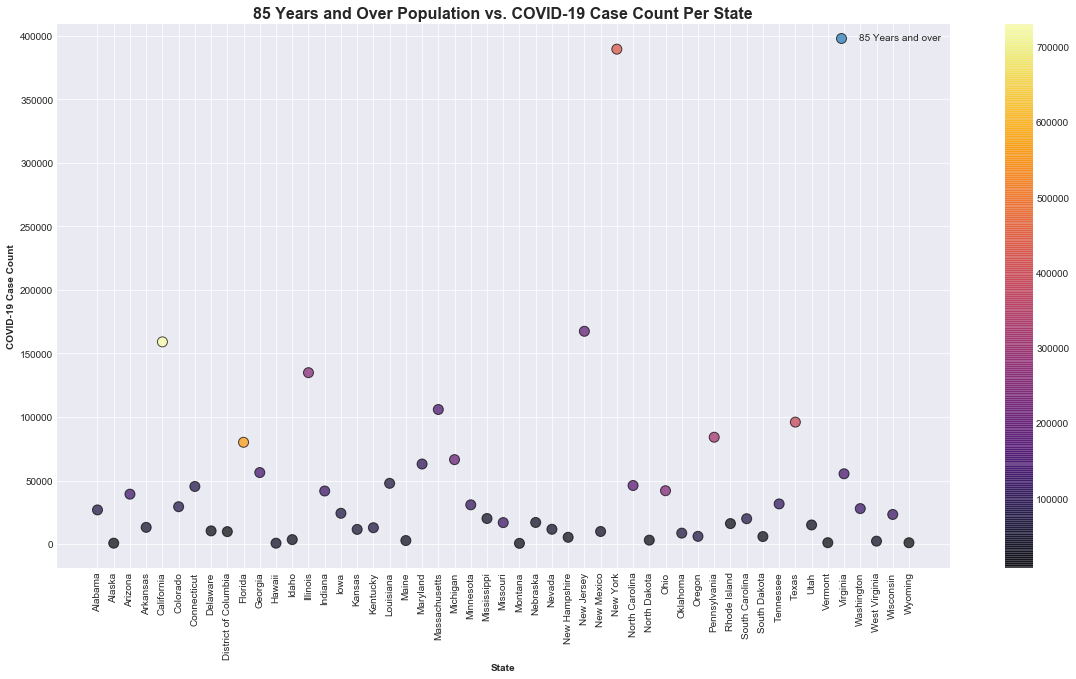

In [54]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['85 years and over'], cmap = 'inferno')
plt.title('85 Years and Over Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['85 Years and over'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

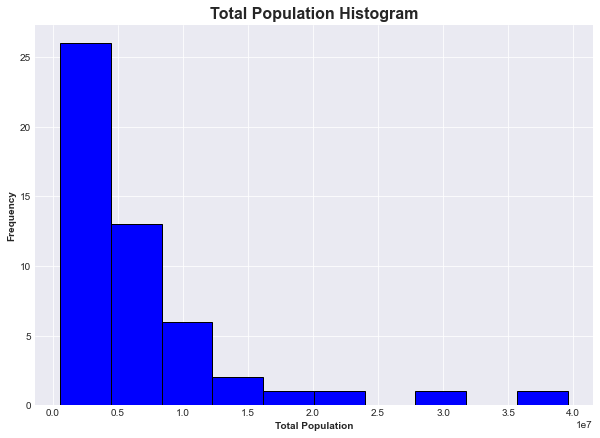

In [320]:
plt.style.use('seaborn-darkgrid')

df['Total Population'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

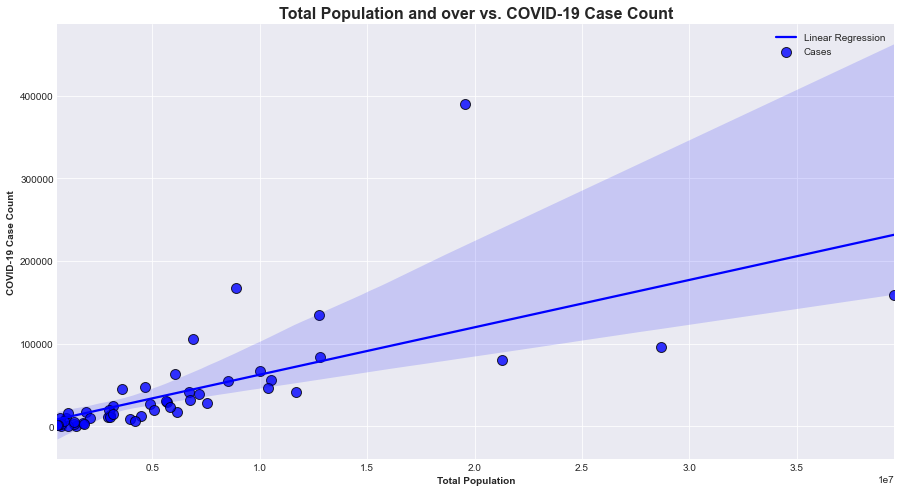

In [321]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Population', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Population and over vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [322]:
spearmanr(df['cases'], df['Total Population'])

SpearmanrResult(correlation=0.8960180995475113, pvalue=6.6503977558606605e-19)

# OLS Regression

In [323]:
model14 = sm.OLS(df['cases'], df['Total Population']).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              77.77
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    9.26e-12
Time:                        13:59:44   Log-Likelihood:                         -621.35
No. Observations:                  51   AIC:                                      1245.
Df Residuals:                      50   BIC:                                      1247.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Total Population     0.0061      0.001      8.818      0.000       0.005       0.007
==============================================================================
Omnibus:                       71.460   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.169
Skew:                           3.632   Prob(JB):                    1.78e-179
Kurtosis:                      21.292   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

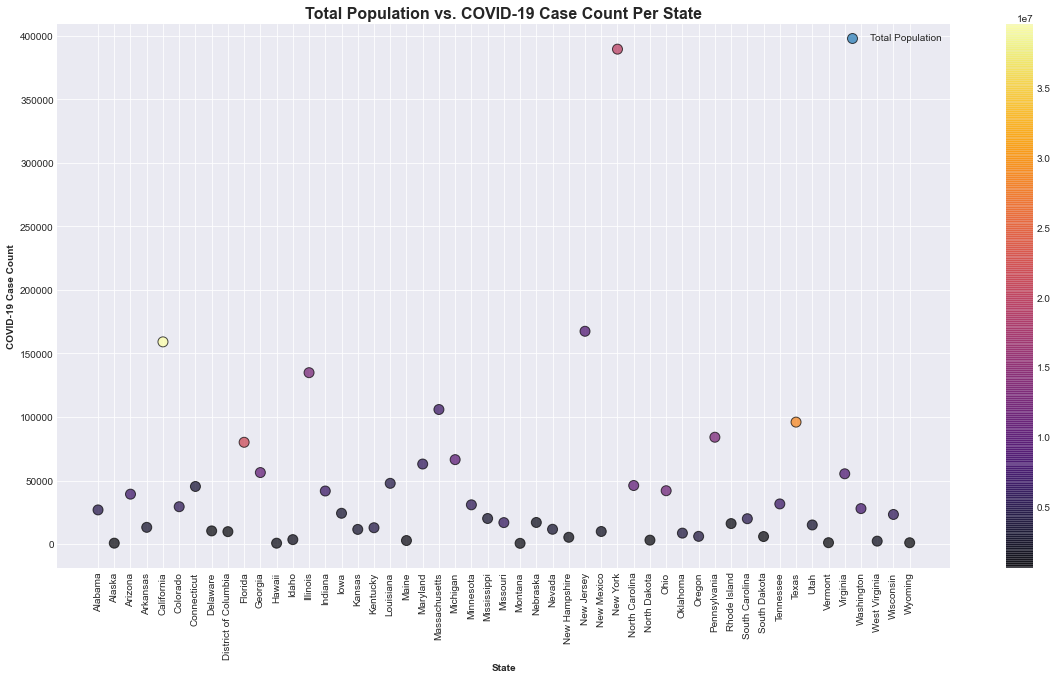

In [324]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Total Population'], cmap = 'inferno')
plt.title('Total Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Population'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [325]:
model15 = sm.OLS(df['cases'], df[['Under 5 years','5 to 9 years','10 to 14 years','15 to 19 years','20 to 24 years','25 to 34 years',
       '35 to 44 years','45 to 54 years','55 to 59 years','60 to 64 years','65 to 74 years','75 to 84 years',
       '85 years and over']]).fit()
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              24.30
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    1.89e-14
Time:                        13:59:45   Log-Likelihood:                         -588.37
No. Observations:                  51   AIC:                                      1203.
Df Residuals:                      38   BIC:                                      1228.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Under 5 years         1.8911      0.594      3.182      0.003       0.688       3.094
5 to 9 years         -1.7281      0.928     -1.863      0.070      -3.606       0.150
10 to 14 years       -1.8297      0.532     -3.440      0.001      -2.907      -0.753
15 to 19 years        0.9449      0.482      1.959      0.058      -0.032       1.921
20 to 24 years        0.2365      0.386      0.613      0.544      -0.545       1.018
25 to 34 years       -0.3476      0.172     -2.025      0.050      -0.695   -7.53e-05
35 to 44 years        0.7110      0.314      2.261      0.030       0.075       1.347
45 to 54 years       -0.0534      0.253     -0.211      0.834      -0.565       0.458
55 to 59 years       -0.0953      0.593     -0.161      0.873      -1.295       1.105
60 to 64 years        1.0400      0.549      1.895      0.066      -0.071       2.151
65 to 74 years       -0.8363      0.449     -1.862      0.070      -1.745       0.073
75 to 84 years        0.7373      0.642      1.148      0.258      -0.563       2.037
85 years and over    -0.6450      0.738     -0.874      0.388      -2.139       0.849
==============================================================================
Omnibus:                        3.113   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.258
Skew:                           0.272   Prob(JB):                        0.323
Kurtosis:                       3.876   Cond. No.                         892.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""